<center><b><p><font size="4">      Nonlinear response of a KiK-net station borehole (Japan) versus its linear response </font></p></b></center>

Automatic codes to compute the response of a KiK-net station (one at the surface and one in a borehole) during strong ground shaking (e.g., non-linear response of the ground) and compare it to its linear response, which is computed from seismic events with ground motions that did not exceed 10 gal (0.1 m/s<sup>2</sup>). 

<b> Data download </b>

NOTE: A Hi-net account is required to download the data and can be obtained at <a href="url">https://hinetwww11.bosai.go.jp/nied/registration/?LANG=en</a>

The KiK-net data can be downloaded:
<ul>
<li>using the maximum acceleration recorded at the station at: <a href="url">http://www.kyoshin.bosai.go.jp/kyoshin/data/index_en.html</a></li>
<li> using the earthquake magnitude at: 
<a href="url">http://www.kyoshin.bosai.go.jp/kyoshin/search/index_en.html</a></li>
</ul>

In [1]:
clear all
close all
clc

<b> Setting the folder name, station of interest, and filter parameters.</b> 

The folders should have the follwing paths (the name of the station is indicated here by <i>"station_name"</i>):
<ul>
<li> MY_DIR/<i>"station_name"</i>/Mainshock/</li>
<li> MY_DIR/<i>"station_name"</i>/Small_events/</li>
</ul>
MY_DIR corresponds to the "directory" variable in [6].
The "Mainshock" folder contains the waveforms of main event where the non-linearity is likely to occur.
The "Small_events" folder contains the waveforms for the small earthquakes (e.g., linear response expected).

The direct output folders from the KiK-net website should be placed in the "Small_events" and "Mainshock" folders (the format for these folders is the station name followed by the date of the earthquake. The output folders contain 6 files ending with the following 3 characters: EW1, EW2, NS1, NS2, UD1, and UD2).

These files correspond to:
<ul>
<li> NS	Borehole -> NS1</li>
<li> EW	Borehole -> EW1</li>
<li> UD	Borehole -> UD1</li>
<li> NS	Surface  -> NS2</li>
<li> EW	Surface	 -> EW2</li>
<li> UD	Surface  -> UD2</li>
</ul>

Note that the sensor in the borehole might not be aligned in the NS and EW direction. The angles of the components are the same as the one for the Hi-net stations (colocated sensors in the borehole).

In [2]:
directory = '/Users/loic/Desktop/Jupyter_notebook/KiKnet_nonlinearity/Stations' ; % Needs be changed, but the subfolders have to be as described earlier
station = {'IBUH01'};

% Filter parameters
cut   = .05; % in Hz
cut2  = 30;  % in Hz
order = 4;
disp(['Parameters for Butterworth filter: Order: ' num2str(order) ' Filter limits: ' num2str(cut) '-' num2str(cut2) ' Hz'])

i = 1;
%% if more that one station, replace "i = 1" by the following line:
%for i =1 :length(station) %(also need to uncomment the line after saving the files)

Parameters for Butterworth filter: Order: 4 Filter limits: 0.05-30 Hz


<b>Response of the Mainshock</b>

For the KiK-net records, the true start time of the earthquake at the station is obtained by subtracting 15 seconds from the begining of the record provided by KiK-net. To obtain a more precise P-wave arrival time of the earthquake, we use a simple version of the automatic P-phase arrival time picker Matlab code from <font color="blue">Kalkan (2016)</font> to checked if there is a clear P-wave arriving between 10 and 30 s after the begining of the signal.

If a clear P-wave is detected, the code keeps the P-wave arrival time in memory. The horizontal (NS and EW) components in the borehole for the earthquake are selected, zero-padded, and combined into a complex number. Then, we  compute the Fourier transform of the complex number, and smooth the amplitude spectrum with a Konno-Ohmachi filter with a smoothing parameter of 100 (<font color="blue">Konno and Ohmachi, 1998</font>). The same process is also done for the horizontal  components at the surface. Finally, the ratio between the two spectra is computed and shown in the figure below as a function of the frequency. This process is very similar to the one used in <font color="blue">Bonilla et al. (2011)</font>.

For the March 11, 2011 Mw 9.0 Tohoku-Oki earthquake recorded at the TKYH12 KiK-net station (the Peak Ground Acceleration, PGA, is 159.5 m/s<sup>2</sup>), amplification peaks can be observed at approzimately 2, 3.5, and 5 Hz. 

<b> References </b>
<ul>
<li> <font color="blue">Bonilla, L. F., K. Tsuda, N. Pulido, J. Regnier, and A. Laurendeau (2011)</font>, Nonlinear site re- sponse evidence of K-NET and KiK-net records from the 2011 off the Pacific coast of Tohoku Earthquake, Earth Planets Space, 63, 785–789 </li>
<li> <font color="blue">Kalkan, E. (2016)</font>, An automatic P-phase arrival time picker, Bull. of Seismol. Soc. of Am., 106, No. 3, doi: 10.1785/0120150111</li>
<li> <font color="blue">Konno, K., and T. Ohmachi (1998)</font>, Ground-motion characteristics estimated from spectral ratio between horizontal and vertical components of microtremor, Bull. Seismol. Soc. Am., (1), 228–241</li>
</ul>

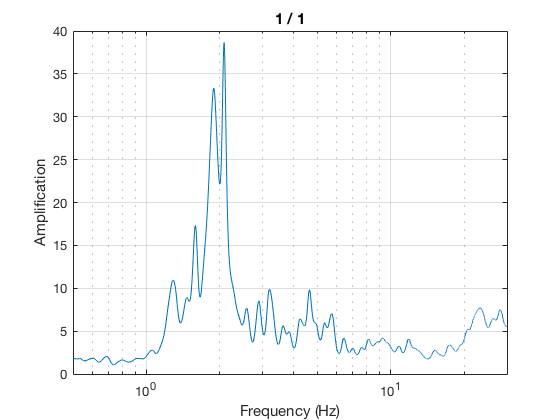

In [3]:
% Search for the earthquake in the Mainshock folder.
dir_fold_main = dir([directory '/' station{i} '/Mainshock/' station{i} '*']);
% Computes the response of the borehole for this station.
[dat_m] = KiKnet_borehole_response(dir_fold_main, station{i}, [cut cut2], order, 1, 1);

<b>Response of small events</b>

!! THIS PART OF THE CODE MIGHT TAKE SOME TIME TO RUN !!

In this example, all the records that triggered accelerations less than 10 gal (0.1  m/s<sup>2</sup>) at the station from 2007 were downloaded from the KiK-net website (564 event). 

For most earthquakes, however, it is not possible to detect clear P-wave arrivals. To checked if there is a clear P-wave arriving between 10 and 30 s after the begining of the signal, we also use the code from <font color="blue">Kalkan (2016)</font>.

If a clear P-wave is detected, the code keeps the P-wave arrival time in memory. For all the selected events, the horizontal components of the borehole NS and EW sensors are combined to form a complex number, and the FFT is applied to this number. Finally, the amplitude of the FFT is kept. The same process is also done for the surface components.
Finally, the ratio between the two spectra is computed and shown in the figure below for the 212 small events that have been selected. For stable results, the number of events needs to be >20.

In the FIgure below, three peaks are can be visible even if the 212 curves do not have the exact same shape.  

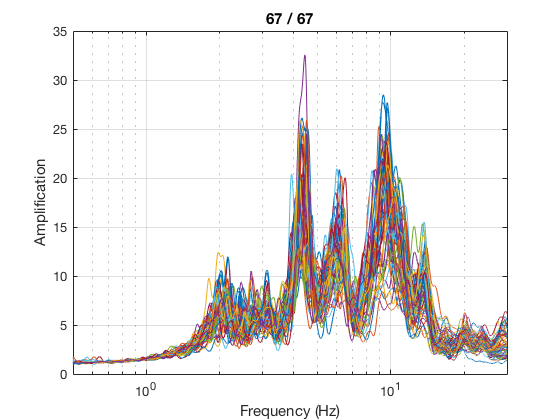

In [4]:
    dir_fold_small = dir([directory '/' station{i} '/Small_events/' station{i} '*']);
    dat_s = KiKnet_borehole_response(dir_fold_small, station{i}, [cut cut2], order, 1, 1);

<b> Geometrical mean and std</b>

To obtain an estimate of the linear response of the borehole from the near surface amplification computed above, we compute the geometrical mean and its standard deviation:

In [5]:
    dat = dat_s.ratio;
    [ave, std1, std2] = Geo_average_KiK(dat);

<b> Plot results </b>

We finally plot the amplification of the ground during the mainshock (in red) and the geometrical mean (blue) and the standard deviation to the mean for the small events (grey area).

For the 2011 Tohoku-Oki earthquake, we can observe a clear deamplification and shift towards lower frequencies for the frequencies higher than 3 Hz. This is characteristic of a non-linear response of the near surface.

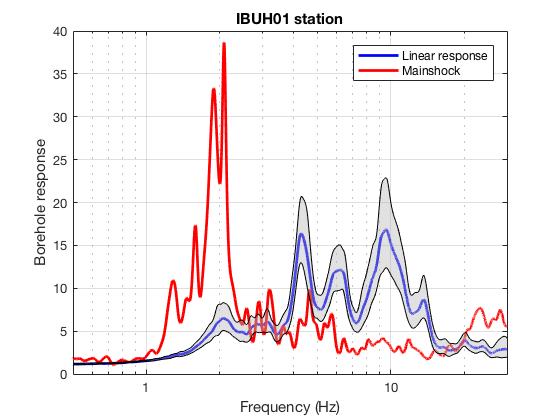

In [6]:
    fig = figure;    
    semilogx(dat_s.f, ave, 'b', 'linewidth', 2)
    hold on
    
    semilogx(dat_m.f, dat_m.ratio, 'r', 'linewidth', 2)
    
    dat_s.f(1) = 1.0000e-03;
    fill([dat_s.f fliplr(dat_s.f)], [std1(2,:) fliplr(std1(1,:))], [0.7 0.7 .7], 'FaceAlpha', 0.4)
    
    set(gca, 'XScale', 'log')
    xlim([.5 30])
      
    plot(dat_s.f, std1(1,:), 'k')
    semilogx(dat_s.f, std1(2,:), 'k')
    title([station{i} ' station'])
    xlabel('Frequency (Hz)')
    ylabel('Borehole response')
    grid on
    
    leg = legend('Linear response', 'Mainshock')  ;
    set(leg, 'location', 'northeast')
    set(gca, 'XTickLabel', {'1';'10'});
    

<b> Save data </b>

We save the data.

In [7]:
    data.dat_m = dat_m;
    data.dat_s = dat_s;
    data.average = ave;
    data.std1 = std1;
    data.std2 = std2;
    save([ directory '/' station{i} '/'  station{i} '_Borehole_response.mat'] , 'data')

<b>Functions</b>
    
All the functions used for this example are below.

In [8]:
%%file KiKnet_borehole_response.m
function  [dat_s] = KiKnet_borehole_response(dir_fold, station, bpcut , order, trust, plt)

cp = 1;
for ii = 1: length(dir_fold)
    listHZ =  [dir([dir_fold(ii).folder '/'  dir_fold(ii).name '/' station '*EW*']); ...
        dir([dir_fold(ii).folder  '/'  dir_fold(ii).name '/' station '*NS*'])];
    listUD =  dir([dir_fold(ii).folder  '/'  dir_fold(ii).name '/' station '*UD*']);
    
    cut_time = 10;
    cut_time2 = cut_time + 20 ;
    
    for iii =1:length(listUD)
        filename = [listUD(iii).folder '/' listUD(iii).name ];
        [h, t, delta] = read_KiK_net(filename);
        h = h-mean(h);
        h = BP_butter_Filter(h,order,delta,bpcut(1),bpcut(2));
        dataUD(:,iii) = h;
        [loc(iii), snr_db(iii)] = Simple_PphasePicker(dataUD(cut_time*delta :cut_time2*delta, iii), 1/delta);
    end
        
    if  (abs(loc(1) - loc(2)))<1  && loc(2)>1 &&loc(1)>1 && delta==100 && length(dataUD(:,2))>10000
        mean_loc = loc(2)+cut_time- 1;
        
        if trust ==1
            for ik = 1:length(listHZ)
                filename = [listHZ(ik).folder '/' listHZ(ik).name ];
                [h_f,~, ~] = read_KiK_net(filename);
                h_f = BP_butter_Filter(h_f, order, delta, bpcut(1), bpcut(2));
                dat_s.dataHZ{cp}(:,ik) = h_f;
            end
            
            dat_s.Keep_event(cp) = ii;
            dat_s.mean_loc_f(cp) = mean_loc*delta;
            dat_s.len_sign(cp) = length(dataUD(:,2));
            cp = cp+1;
        else
            figure
            subplot(3,1,1)
            plot( t(1:length(dataUD(cut_time*delta:cut_time2*delta,1)))+cut_time, dataUD(cut_time*delta:cut_time2*delta,1) )
            hold on
            plot(loc(iii)+cut_time,0, 'xr')
            xlim([cut_time cut_time2])
            title( [num2str(ii) ' / ' num2str(length(dir_fold))] )
            
            subplot(3,1,2)
            plot( t(1:length(dataUD(cut_time*delta:cut_time2*delta,2))) + cut_time, dataUD(cut_time*delta:cut_time2*delta,2) )
            hold on
            plot(loc(1)+cut_time,0, 'xr')
            xlim([cut_time cut_time2])
            subplot(3,1,3)
            plot(t, dataUD(:,2))
            hold on
            plot(loc(2) + cut_time,0, 'xr')
            while(1)
                m=input('Press [n] if you want to skip the event, enter or any other key to accept: ','s');
                if m=='n'
                    break
                else
                    for ik = 1:length(listHZ)
                        filename = [listHZ(ik).folder '/' listHZ(ik).name ];
                        [h_f,~, ~] = read_KiK_net( filename );
                        h_f = BP_butter_Filter( h_f, order, delta, bpcut(1), bpcut(2) );
                        dat_s.dataHZ{cp}(:,ik) = h_f;
                    end
                    
                    dat_s.Keep_event(cp) = ii;
                    dat_s.mean_loc_f(cp) = mean_loc*delta;
                    dat_s.len_sign(cp) = length(dataUD(:,2));
                    cp = cp+1;
                    break
                end
            end
            close all
        end
    end
    dataUD = [];
    h = [];  
end

dif_len = min(dat_s.len_sign - dat_s.mean_loc_f);


for ij = 1:length(dat_s.Keep_event)
    
    lim_ini = round(dat_s.mean_loc_f(ij));
    
    hann = hanning( .5*delta );
    dataf{ij}(:,iii) = zeros(500*delta, 1);
    for iii=1:length(listHZ)
        dataf{ij}(1:dif_len+1,iii) = dat_s.dataHZ{ij}( lim_ini:lim_ini+dif_len, iii ) ;
        dataf{ij}(1:length(hann)/2,iii) = dataf{ij}(1:length(hann)/2,iii).*hann(1:end/2);
    end
    datacompl{ij}(:,1) = complex( dataf{ij}(:,1), dataf{ij}(:,3) );
    datacompl{ij}(:,2) = complex( dataf{ij}(:,2), dataf{ij}(:,4) );
    [ dataftt{ij}(:,1), ~] = FFT_amplitude( datacompl{ij}(:,1), delta ) ;
    [ dataftt{ij}(:,2), f] = FFT_amplitude( datacompl{ij}(:,2), delta ) ;
    for iii =1 :2
        [dataftt{ij}(:,iii)] = liskonno(f, dataftt{ij}(:,iii), 100);
    end
    dat_s.ratio(ij,:) = abs(dataftt{ij}(:,2))./abs(dataftt{ij}(:,1));
    dat_s.f = f;
    
    if plt ==1
        semilogx(f, dat_s.ratio(ij,:))
        hold on
        xlim([.5 30])
        title([num2str(ij) ' / ' num2str(length(dat_s.Keep_event)) ])
        xlabel('Frequency (Hz)')
        ylabel('Amplification')
        grid on
%         pause(.1)
    end
    
end



Created file '/Users/loic/Desktop/Jupyter_notebook/KiKnet_nonlinearity/Jupyter_notebook/KiKnet_borehole_response.m'.


<b> FFT amplitude function </b>

The following function computes the FFT of the complex number and keeps the amplitude spectrum of the input waveform. Note that as we compute the FFT of a complex number, the FFT is not symetric. That is why both sides of the FFT are summed together.

In [9]:
%%file FFT_amplitude.m
function [y, f] = FFT_amplitude(data, delta)
dt = 1/delta;
N = length(data);
nf = N/2+1;
df = 1/(dt*N);
fmax = 1/dt/2;
f = 0:df:fmax;
ampl_fft = dt*abs(fft(data));
y(1) = ampl_fft(1);
for i=2:nf
    y(i) = ampl_fft(i)+ampl_fft(N-i+2);
end

Created file '/Users/loic/Desktop/Jupyter_notebook/KiKnet_nonlinearity/Jupyter_notebook/FFT_amplitude.m'.


<b>Two-pass Butterworth filter function (zero-phase digital filter)</b>

In [10]:
%%file BP_butter_Filter.m
function y = BP_butter_Filter(data, order, delta, cut, cut2)

data = detrend(data);
data = data-mean(data);

w=[cut/(delta/2) cut2/(delta/2)];
[z, p, k]=butter(order,w,'bandpass');
[sos,g]=zp2sos(z,p,k);

y = filtfilt(sos,g,data);

Created file '/Users/loic/Desktop/Jupyter_notebook/KiKnet_nonlinearity/Jupyter_notebook/BP_butter_Filter.m'.


<b> PphasePicker function from Kalkan (2016)</b>

In [11]:
%%file Simple_PphasePicker.m
function [loc, snr_db] = Simple_PphasePicker(x, dt)
%   AN AUTOMATIC P-PHASE ARRIVAL TIME PICKER
%
%   Computes P-phase arrival time in windowed digital single-component
%   acceleration or broadband velocity record without requiring threshold
%   settings. Returns P-phase arrival time in second, and signal-to-noise
%   ratio in decibel. Input waveform must be an evenly spaced vector.
%
%   Syntax:
%      [loc, snr_db] = PphasePicker(x, dt, type, pflag, Tn, xi, nbins, o)
%
%   Input:
%            x = raw broadband velocity or acceleration data in
%                single-column format
%           dt = sampling interval in second (e.g., 0.005)

%   Output:
%          loc = P-phase arrival time in second
%       snr_db = signal-to-noise ratio in decibel
%
%   Example:
%          Let x be a single component strong-motion acceleration waveform
%          with 100 sample per second (dt = 0.01). The input for
%          P-phase picking will be
%
%          [loc, snr_db] = PphasePicker(x, 0.01);
%
%
%   IMPORTANT NOTE- 1: If sampling rate of input signal is lower than 100
%   samples-per-second, use Tn = 0.1 s instead of 0.01 s to avoid numerical
%   errors. If Tn is not specified, default values will be used based on
%   the sampling rate.
%
%   Kalkan, E. (2016). "An automatic P-phase arrival time picker", Bull. of
%   Seismol. Soc. of Am., 106, No. 3, doi: 10.1785/0120150111
%
%   THIS SOFTWARE IS PROVIDED "AS IS" AND ANY EXPRESS OR IMPLIED
%   WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF
%   MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN
%   NO EVENT SHALL THE COPYRIGHT OWNER BE LIABLE FOR ANY DIRECT, INDIRECT,
%   INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING,
%   BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS
%   OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND
%   ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR
%   TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE
%   USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH
%   DAMAGE.
%
%   Written by Dr. Erol Kalkan, P.E. (ekalkan@usgs.gov)
%   $Revision: 16.0 $  $Date: 2017/02/17 18:14:00 $
%   Modified by Loic Viens Date: 2018/09/06 

if nargin == 2
    validateattributes(x,{'double'},{'real','finite','vector'}, ...
        'PphasePicker','X');
    validateattributes(dt,{'double'},{'real','finite','scalar'}, ...
        'PphasePicker','DT');
else
    error('Not enough inputs.  See help documentation.');
end


    if dt <= 0.01
        Tn = 0.01;
        nbins = round(2/dt);
    else
        Tn = 0.1;
        nbins = 200;
    end
    xi = 0.6;

o = 'to_peak';
x_d = detrend(x); % detrend waveform

switch o
    case {'to_peak'}
        ind_peak = find(abs(x_d) == max(abs(x_d)));
        xnew = x_d(1:ind_peak);
    otherwise
        xnew = x_d;
end

% Construct a fixed-base viscously damped SDF oscillator
omegan = 2*pi/Tn;           % natural frequency in radian/second
C = 2*xi*omegan;            % viscous damping term
K = omegan^2;               % stiffness term
y(:,1) = [0;0];             % response vector

% Solve second-order ordinary differential equation of motion
A = [0 1; -K -C]; Ae = expm(A*dt); AeB = A\(Ae-eye(2))*[0;1];
for k = 2:length(xnew); y(:,k) = Ae*y(:,k-1) + AeB*xnew(k); end

veloc = (y(2,:))';          % relative velocity of mass
Edi = 2*xi*omegan*veloc.^2; % integrand of viscous damping energy

% Apply histogram method
R = statelevel(Edi,nbins);
locs = find(Edi > R(1));
indx = find(xnew(1:locs(1)-1).*xnew(2:locs(1)) < 0); % get zero crossings
TF = isempty(indx);

% Update first onset
if TF == 0
    loc = indx(end)*dt;
else
    R = statelevel(Edi,ceil(nbins/2)); % 
    locs = find(Edi > R(1));
    indx = find(xnew(1:locs(1)-1).*xnew(2:locs(1)) < 0); % get zero crossings
    TF = isempty(indx);
    if TF == 0
        loc = indx(end)*dt; 
    else
        loc = -1; 
    end
end

% Compute SNR
if ~loc == -1
    snr_db = -1;
else
    snr_db = SNR(x,x(1:round(loc/dt)));
end
return

function [levels, histogram, bins] = statelevel(y,n)
ymax = max(y);
ymin = min(y)-eps;

% Compute Histogram
idx = ceil(n * (y-ymin)/(ymax-ymin));
idx = idx(idx>=1 & idx<=n);
histogram = zeros(n, 1);
for i=1:numel(idx)
    histogram(idx(i)) = histogram(idx(i)) + 1;
end

% Compute Center of Each Bin
ymin = min(y);
Ry = ymax-ymin;
dy = Ry/n;
bins = ymin + ((1:n)-0.5)*dy;

% Compute State Levels
iLowerRegion = find(histogram > 0, 1, 'first');
iUpperRegion = find(histogram > 0, 1, 'last');

iLow  = iLowerRegion(1);
iHigh = iUpperRegion(1);

% Define the lower and upper histogram regions halfway
% between the lowest and highest nonzero bins.
lLow  = iLow;
lHigh = iLow + floor((iHigh - iLow)/2);
uLow  = iLow + floor((iHigh - iLow)/2);
uHigh = iHigh;

% Upper and lower histograms
lHist = histogram(lLow:lHigh, 1);
uHist = histogram(uLow:uHigh, 1);

levels = zeros(1,2);
[~, iMax] = max(lHist(2:end));
[~, iMin] = max(uHist);
levels(1) = ymin + dy * (lLow + iMax(1) - 1.5);
levels(2) = ymin + dy * (uLow + iMin(1) - 1.5);

return

function [r] = SNR(signal,noise)
%  Compute signal-to-noise ratio 
aps = mean(signal.^2); % average power of signal
apn = mean(noise.^2);  % average power of noise
r = 10*log10(aps/apn); % signal-to-noise ratio in decibel
return

Created file '/Users/loic/Desktop/Jupyter_notebook/KiKnet_nonlinearity/Jupyter_notebook/Simple_PphasePicker.m'.


<b> Geometrical mean and std function </b>

In [12]:
%%file Geo_average_KiK.m
function [aver, std1, std2] = Geo_average_KiK(data)

% Compute geometric mean
aver = geomean(data);

for k = 1:length(data)
    si = 0;
    for l = 1:length(data(:,1))
        si = (log(data(l,k)) - log(aver(k)))^2 + si;
    end    
    % One std to the mean
    std1(1,k) = exp(log(aver(k)) + sqrt(si/(length(data(:,1))-1)));
    std1(2,k) = exp(log(aver(k)) - sqrt(si/(length(data(:,1))-1)));
    
    %  Two std to the mean
    std2(1,k) = exp(log(aver(k)) + 2*sqrt(si/(length(data(:,1))-1)));
    std2(2,k) = exp(log(aver(k)) - 2*sqrt(si/(length(data(:,1))-1)));
end



Created file '/Users/loic/Desktop/Jupyter_notebook/KiKnet_nonlinearity/Jupyter_notebook/Geo_average_KiK.m'.


<b>Function to import the KiK-net data</b>

In [13]:
%%file read_KiK_net.m

% Read KiK-net data
% Input: 
% Output:
%     - h: detrend/demean data time series
%     - t: Time series 

function [h, t, delta] = read_KiK_net(filename)

[x1, x2, x3, x4, x5, x6, x7, x8] = importfile_KiK_net(filename);
[~,~,VarName3,~] = importfile_KiK_header(filename);

fac_str = VarName3{14};
fac = str2num(strrep(fac_str,'(gal)',''));

del = VarName3{11};
delta = str2num(strrep(del,'Hz',''));

x=[x1,x2,x3,x4,x5,x6,x7,x8];

k=1;
for j=1:length(x1)
    for i=1:8
        h(k,:)=x(j,i);
        k=k+1;
    end
end
h(isnan(h)) = [];
h = detrend(h);
h = h-mean(h);

t = 0: 1/delta:length(h)/delta -1/delta;
h = h.*fac;

h = detrend(h);
h = h - mean(h);

Created file '/Users/loic/Desktop/Jupyter_notebook/KiKnet_nonlinearity/Jupyter_notebook/read_KiK_net.m'.


<b>Function to import the KiK-net data</b>

In [14]:
%%file importfile_KiK_net.m
function [OriginT,ime,VarName3,VarName4,VarName5,VarName6,VarName7,VarName8] = importfile_KiK_net(filename, startRow, endRow)
%IMPORTFILE Import numeric data from a text file as column vectors.
%   [ORIGINT,IME,VARNAME3,VARNAME4,VARNAME5,VARNAME6,VARNAME7,VARNAME8] =
%   IMPORTFILE(FILENAME) Reads data from text file FILENAME for the default
%   selection.
%
%   [ORIGINT,IME,VARNAME3,VARNAME4,VARNAME5,VARNAME6,VARNAME7,VARNAME8] =
%   IMPORTFILE(FILENAME, STARTROW, ENDROW) Reads data from rows STARTROW
%   through ENDROW of text file FILENAME.
%
% Example:
%   [OriginT,ime,VarName3,VarName4,VarName5,VarName6,VarName7,VarName8] =
%   importfile('ABSH011104072332.UD1',18, 1842);
%
%    See also TEXTSCAN.

% Auto-generated by MATLAB on 2015/12/07 16:26:05

%% Initialize variables.
if nargin<=2
    startRow = 18;
    endRow = inf;
end

%% Format string for each line of text:
%   column1: double (%f)
%	column2: double (%f)
%   column3: double (%f)
%	column4: double (%f)
%   column5: double (%f)
%	column6: double (%f)
%   column7: double (%f)
%	column8: double (%f)
% For more information, see the TEXTSCAN documentation.
formatSpec = '%8f%9f%9f%9f%9f%9f%9f%9f%[^\n\r]';

%% Open the text file.
fileID = fopen(filename,'r');

%% Read columns of data according to format string.
% This call is based on the structure of the file used to generate this
% code. If an error occurs for a different file, try regenerating the code
% from the Import Tool.
dataArray = textscan(fileID, formatSpec, endRow(1)-startRow(1)+1, 'Delimiter', '', 'WhiteSpace', '', 'HeaderLines', startRow(1)-1, 'ReturnOnError', false);
for block=2:length(startRow)
    frewind(fileID);
    dataArrayBlock = textscan(fileID, formatSpec, endRow(block)-startRow(block)+1, 'Delimiter', '', 'WhiteSpace', '', 'HeaderLines', startRow(block)-1, 'ReturnOnError', false);
    for col=1:length(dataArray)
        dataArray{col} = [dataArray{col};dataArrayBlock{col}];
    end
end

%% Close the text file.
fclose(fileID);

%% Post processing for unimportable data.
% No unimportable data rules were applied during the import, so no post
% processing code is included. To generate code which works for
% unimportable data, select unimportable cells in a file and regenerate the
% script.

%% Allocate imported array to column variable names
OriginT = dataArray{:, 1};
ime = dataArray{:, 2};
VarName3 = dataArray{:, 3};
VarName4 = dataArray{:, 4};
VarName5 = dataArray{:, 5};
VarName6 = dataArray{:, 6};
VarName7 = dataArray{:, 7};
VarName8 = dataArray{:, 8};

Created file '/Users/loic/Desktop/Jupyter_notebook/KiKnet_nonlinearity/Jupyter_notebook/importfile_KiK_net.m'.


<b>Function to read the KiK-net data header</b>

In [15]:
%%file importfile_KiK_header.m

function [Origin,Time,VarName3,VarName4] = importfile_KiK_header(filename, startRow, endRow)
%IMPORTFILE Import numeric data from a text file as column vectors.
%   [ORIGIN,TIME,VARNAME3,VARNAME4] = IMPORTFILE(FILENAME) Reads data from
%   text file FILENAME for the default selection.
%
%   [ORIGIN,TIME,VARNAME3,VARNAME4] = IMPORTFILE(FILENAME, STARTROW,
%   ENDROW) Reads data from rows STARTROW through ENDROW of text file
%   FILENAME.
%
% Example:
%   [Origin,Time,VarName3,VarName4] = importfile('ABSH011104072332.UD1',1,
%   17);
%
%    See also TEXTSCAN.

% Auto-generated by MATLAB on 2015/12/07 16:27:55

%% Initialize variables.
delimiter = ' ';
if nargin<=2
    startRow = 1;
    endRow = 17;
end

%% Format string for each line of text:
%   column1: text (%s)
%	column2: text (%s)
%   column3: text (%s)
%	column4: text (%s)
% For more information, see the TEXTSCAN documentation.
formatSpec = '%s%s%s%s%*s%*s%*s%*s%[^\n\r]';

%% Open the text file.
fileID = fopen(filename,'r');

%% Read columns of data according to format string.
% This call is based on the structure of the file used to generate this
% code. If an error occurs for a different file, try regenerating the code
% from the Import Tool.
dataArray = textscan(fileID, formatSpec, endRow(1)-startRow(1)+1, 'Delimiter', delimiter, 'MultipleDelimsAsOne', true, 'HeaderLines', startRow(1)-1, 'ReturnOnError', false);
for block=2:length(startRow)
    frewind(fileID);
    dataArrayBlock = textscan(fileID, formatSpec, endRow(block)-startRow(block)+1, 'Delimiter', delimiter, 'MultipleDelimsAsOne', true, 'HeaderLines', startRow(block)-1, 'ReturnOnError', false);
    for col=1:length(dataArray)
        dataArray{col} = [dataArray{col};dataArrayBlock{col}];
    end
end

%% Close the text file.
fclose(fileID);

%% Post processing for unimportable data.
% No unimportable data rules were applied during the import, so no post
% processing code is included. To generate code which works for
% unimportable data, select unimportable cells in a file and regenerate the
% script.

%% Allocate imported array to column variable names
Origin = dataArray{:, 1};
Time = dataArray{:, 2};
VarName3 = dataArray{:, 3};
VarName4 = dataArray{:, 4};

Created file '/Users/loic/Desktop/Jupyter_notebook/KiKnet_nonlinearity/Jupyter_notebook/importfile_KiK_header.m'.
